In [123]:
#Importing libraries
import pandas as pd
import csv
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np
import seaborn as sns; sns.set_theme()
import fbprophet
from fbprophet import Prophet
plt.style.use('fivethirtyeight')
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [124]:
#Importing csv file
df = pd.read_csv('AC_Data.csv')

In [125]:
df.head()

0      AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
0  2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
1  2019-08-01 00:01:00       NaN       NaN   NaN   NaN       NaN       NaN   
2  2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
3  2019-08-01 00:03:00       NaN       NaN   NaN   NaN       NaN       NaN   
4  2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0  2.592095  3.800127   

       AC 7      AC 8      AC 9     AC 10     AC 11     AC 12     AC 13  \
0  2.782276  4.624447  5.222060  2.151238  1.585072  0.560373  3.142941   
1       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
2  2.529366  5.057423  5.349465  2.414715  2.168184  1.818730  3.085110   
3       NaN       NaN       NaN       NaN       NaN       NaN       NaN   
4  2.332304  6.322521  3.995392  2.237114  3.345624  2.310409  3.132799   

      AC 14     AC 15     AC 16     AC 17     AC 18  
0  2.749470  5.417774  4.113460  3.305072  6.735981  
1       NaN       NaN       NaN       NaN       NaN  
2  2.720484  3.302422  3.986483  3.220588  6.379500  
3       NaN       NaN       NaN       NaN       NaN  
4  2.676861  3.539026  3.797881  3.131560  6.363475

In [126]:
#Making Time column as index
df = df.rename(columns={'0': 'Time'})
df['Time'] = pd.to_datetime(df['Time'])
df = df.set_index('Time')

In [127]:
df.head()

AC 1      AC 2  AC 3  AC 4      AC 5      AC 6  \
Time                                                                      
2019-08-01 00:00:00  7.518632  8.788315   0.0   0.0  2.617045  4.079041   
2019-08-01 00:01:00       NaN       NaN   NaN   NaN       NaN       NaN   
2019-08-01 00:02:00  7.426114  8.940615   0.0   0.0  2.581625  3.781231   
2019-08-01 00:03:00       NaN       NaN   NaN   NaN       NaN       NaN   
2019-08-01 00:04:00  7.052986  9.161103   0.0   0.0  2.592095  3.800127   

                         AC 7      AC 8      AC 9     AC 10     AC 11  \
Time                                                                    
2019-08-01 00:00:00  2.782276  4.624447  5.222060  2.151238  1.585072   
2019-08-01 00:01:00       NaN       NaN       NaN       NaN       NaN   
2019-08-01 00:02:00  2.529366  5.057423  5.349465  2.414715  2.168184   
2019-08-01 00:03:00       NaN       NaN       NaN       NaN       NaN   
2019-08-01 00:04:00  2.332304  6.322521  3.995392  2.237114  3.345624   

                        AC 12     AC 13     AC 14     AC 15     AC 16  \
Time                                                                    
2019-08-01 00:00:00  0.560373  3.142941  2.749470  5.417774  4.113460   
2019-08-01 00:01:00       NaN       NaN       NaN       NaN       NaN   
2019-08-01 00:02:00  1.818730  3.085110  2.720484  3.302422  3.986483   
2019-08-01 00:03:00       NaN       NaN       NaN       NaN       NaN   
2019-08-01 00:04:00  2.310409  3.132799  2.676861  3.539026  3.797881   

                        AC 17     AC 18  
Time                                     
2019-08-01 00:00:00  3.305072  6.735981  
2019-08-01 00:01:00       NaN       NaN  
2019-08-01 00:02:00  3.220588  6.379500  
2019-08-01 00:03:00       NaN       NaN  
2019-08-01 00:04:00  3.131560  6.363475

In [128]:
df.shape

(87840, 18)

In [129]:
#Null values in each column
df.isnull().sum()

AC 1     44132
AC 2     44129
AC 3     44127
AC 4     44136
AC 5     44124
AC 6     44123
AC 7     44161
AC 8     44136
AC 9     44186
AC 10    44150
AC 11    44170
AC 12    44127
AC 13    44121
AC 14    44144
AC 15    44125
AC 16    44130
AC 17    44126
AC 18    44117
dtype: int64

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 87840 entries, 2019-08-01 00:00:00 to 2019-09-30 23:59:00
Data columns (total 18 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AC 1    43708 non-null  float64
 1   AC 2    43711 non-null  float64
 2   AC 3    43713 non-null  float64
 3   AC 4    43704 non-null  float64
 4   AC 5    43716 non-null  float64
 5   AC 6    43717 non-null  float64
 6   AC 7    43679 non-null  float64
 7   AC 8    43704 non-null  float64
 8   AC 9    43654 non-null  float64
 9   AC 10   43690 non-null  float64
 10  AC 11   43670 non-null  float64
 11  AC 12   43713 non-null  float64
 12  AC 13   43719 non-null  float64
 13  AC 14   43696 non-null  float64
 14  AC 15   43715 non-null  float64
 15  AC 16   43710 non-null  float64
 16  AC 17   43714 non-null  float64
 17  AC 18   43723 non-null  float64
dtypes: float64(18)
memory usage: 12.7 MB


In [131]:
 df.describe()

AC 1          AC 2          AC 3          AC 4          AC 5  \
count  43708.000000  43711.000000  43713.000000  43704.000000  43716.000000   
mean       2.379368      3.868892      2.568411      2.395158      1.421699   
std        2.276782      2.545147      1.487508      1.797529      0.767218   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      2.123263      1.706508      1.258299      0.970744   
50%        2.094330      3.791752      2.486992      2.308961      1.380183   
75%        3.661752      5.460892      3.441527      3.476123      1.870234   
max       11.194789     11.147141      8.430909      9.879500      5.495358   

               AC 6          AC 7          AC 8          AC 9         AC 10  \
count  43717.000000  43679.000000  43704.000000  43654.000000  43690.000000   
mean       2.518138      2.980883      2.548711      3.184382      1.538344   
std        1.655560      1.473498      1.504482      1.522291      0.685461   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.543779      2.190803      1.766230      2.294635      1.117139   
50%        2.665063      3.005071      2.608551      3.082134      1.504554   
75%        3.616988      3.897857      3.496358      4.096374      1.963707   
max        9.929291      9.356776      9.331506     10.026747      4.625030   

              AC 11         AC 12         AC 13         AC 14         AC 15  \
count  43670.000000  43713.000000  43719.000000  43696.000000  43715.000000   
mean       2.406141      2.699639      4.279893      2.917122      4.046283   
std        1.554481      1.436087      1.847168      1.454946      2.016898   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        1.591748      1.949729      3.260674      1.852981      3.023501   
50%        2.351361      2.727152      4.217381      2.787084      4.001279   
75%        3.254937      3.566744      5.379832      3.824467      5.260193   
max       10.363151      9.887306      9.796393      9.054969     10.349998   

              AC 16         AC 17         AC 18  
count  43710.000000  43714.000000  43723.000000  
mean       2.800050      4.218979      6.462676  
std        1.606239      1.125491      2.319242  
min        0.000000      0.000000      0.000000  
25%        1.877626      3.752478      4.013579  
50%        2.673698      4.611434      7.131194  
75%        3.695294      4.958306      8.314639  
max       10.654430      5.950261     11.040031

# Most and Least Used AC

In [132]:
ac_cons_list = []
for column in df:
    consumption = df[column].sum()
    ac_cons_list.append(consumption)
    #print(column, ':' , round(consumption,2))

In [133]:
for column in df:
    consumption = df[column].sum()
    if max(ac_cons_list) == consumption:
        print('Most Used AC is:', column, 'with consumption =' , round(consumption,2) , 'units')

Most Used AC is: AC 18 with consumption = 282567.57 units


In [134]:
for column in df:
    consumption = df[column].sum()
    if min(ac_cons_list) == consumption:
        print('Least Used AC is:', column, 'with consumption =' , round(consumption,2) , 'units')

Least Used AC is: AC 5 with consumption = 62151.01 units


# Trend and Seasonality in the series

In [135]:
# resample data to daily level
daily_groups = df.resample('D')
daily_data = daily_groups.sum()

In [136]:
daily_data.shape

(61, 18)

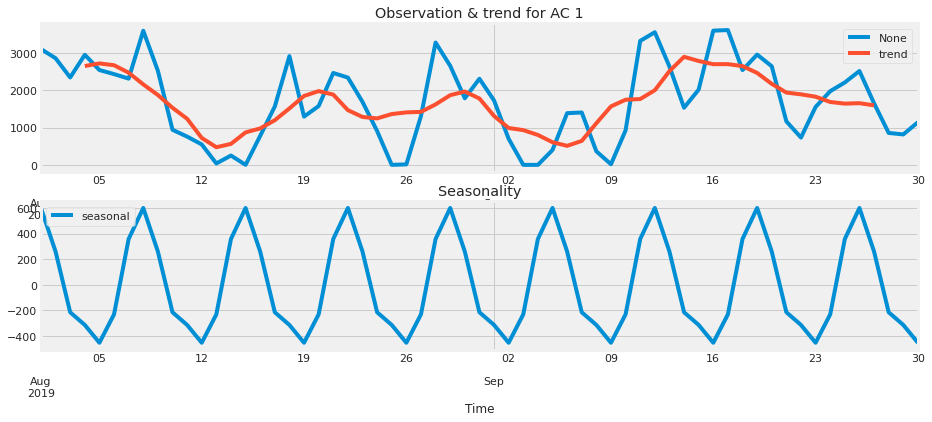

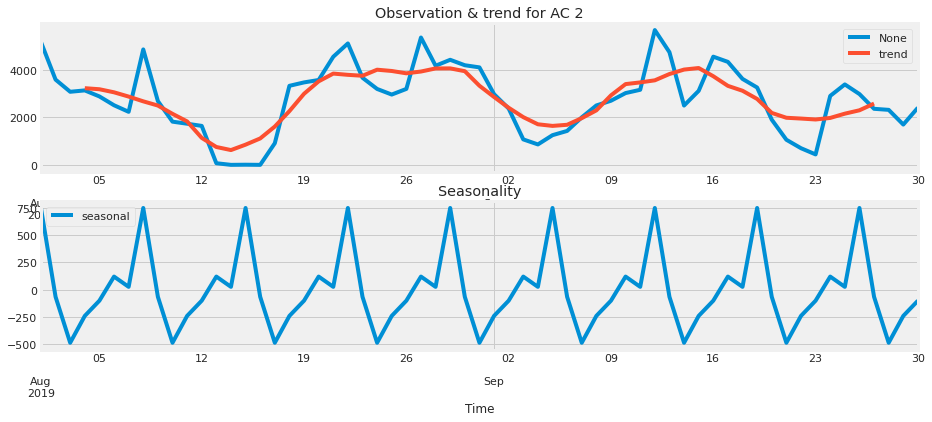

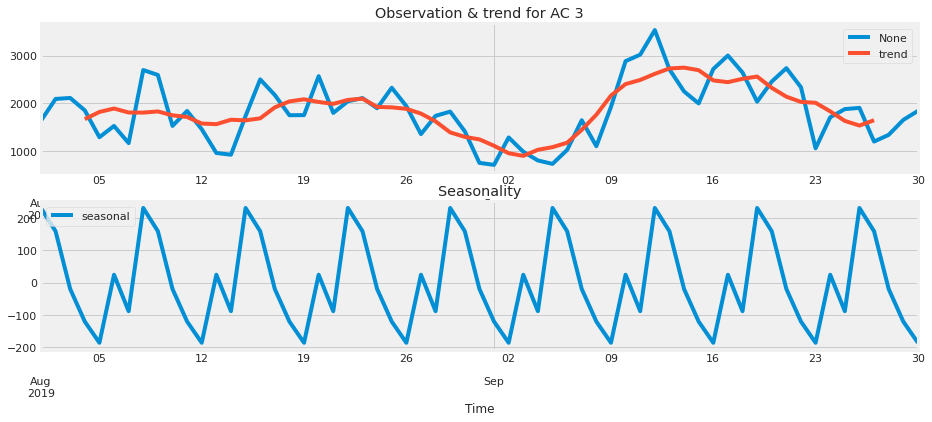

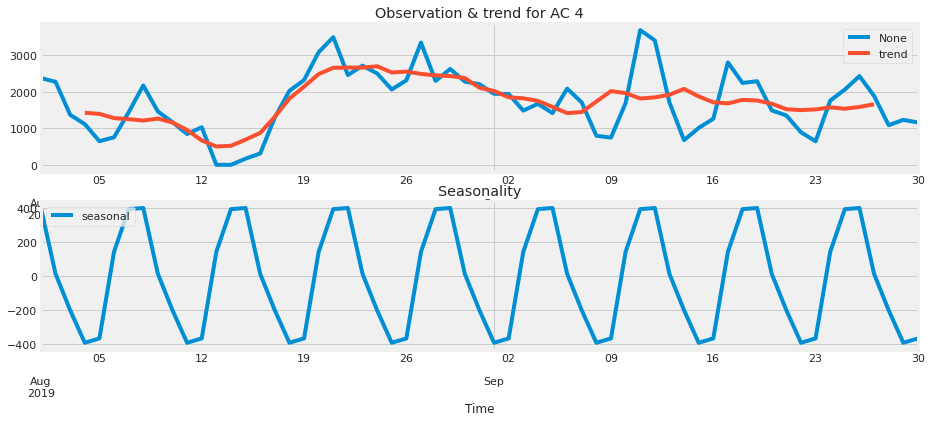

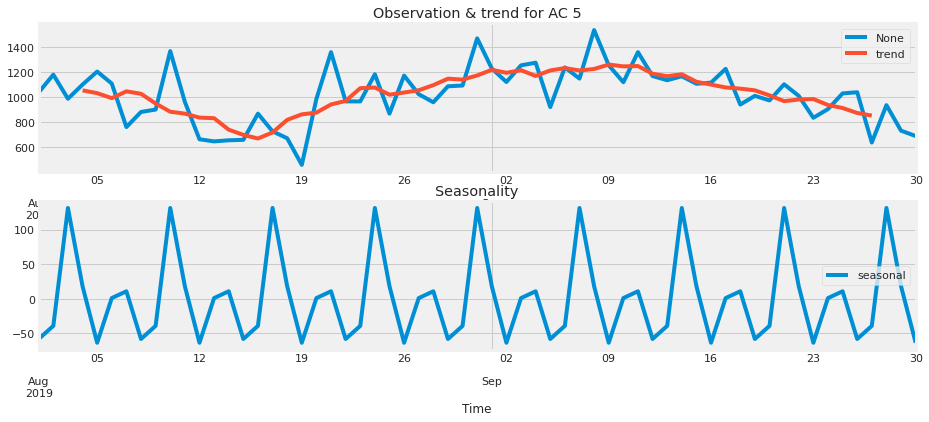

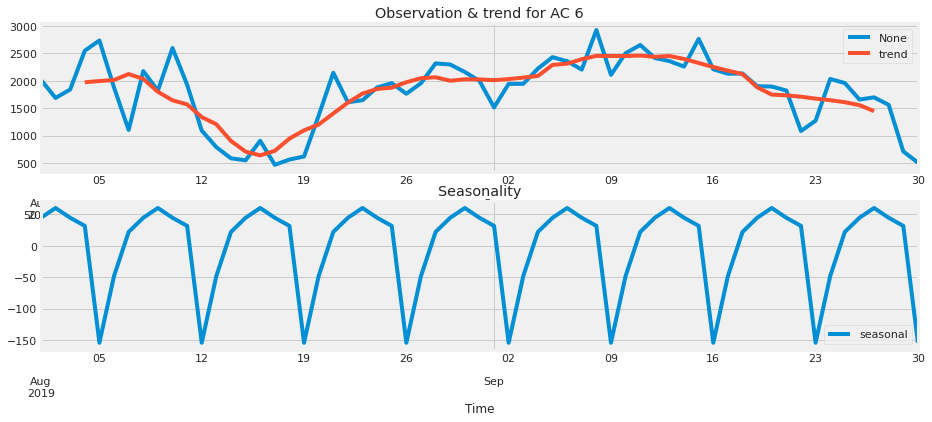

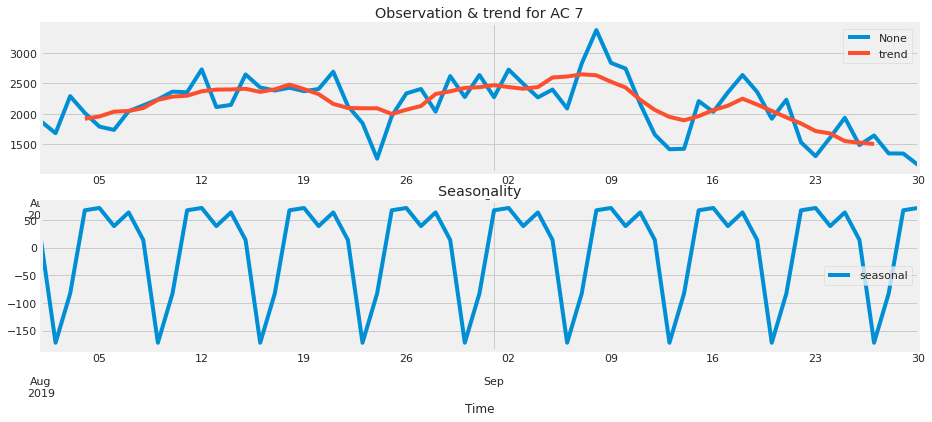

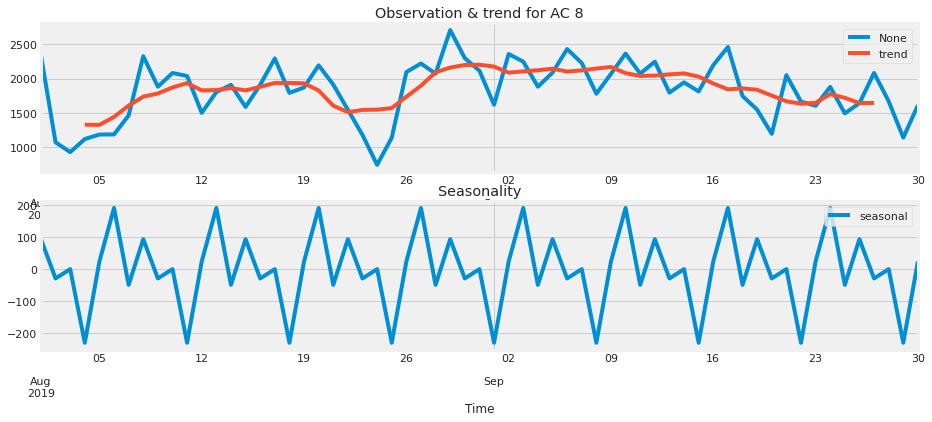

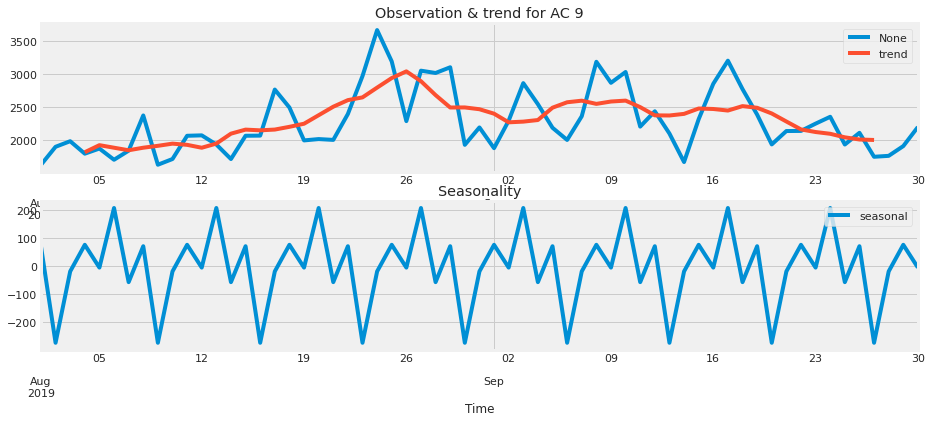

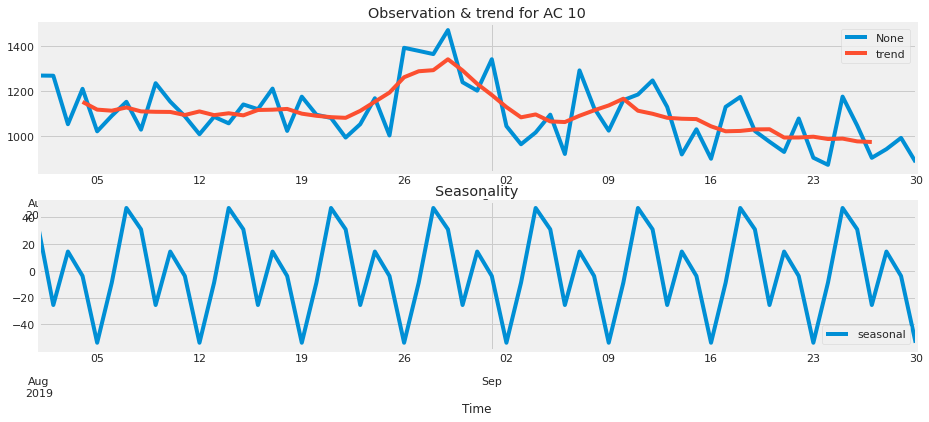

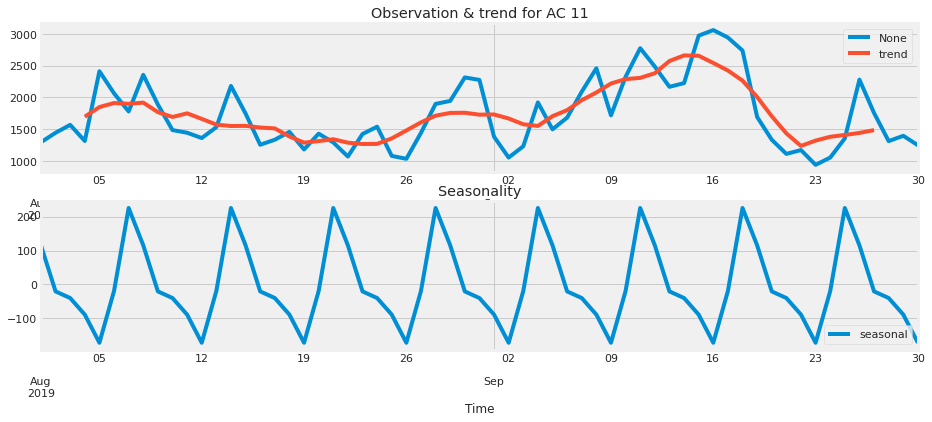

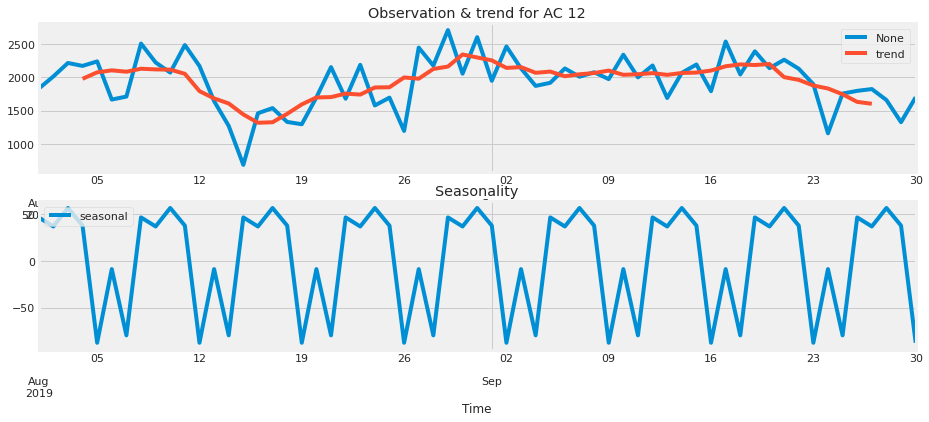

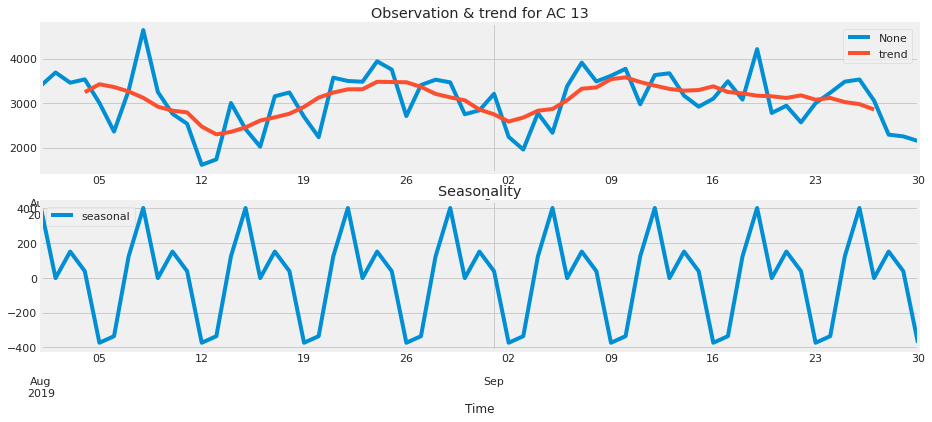

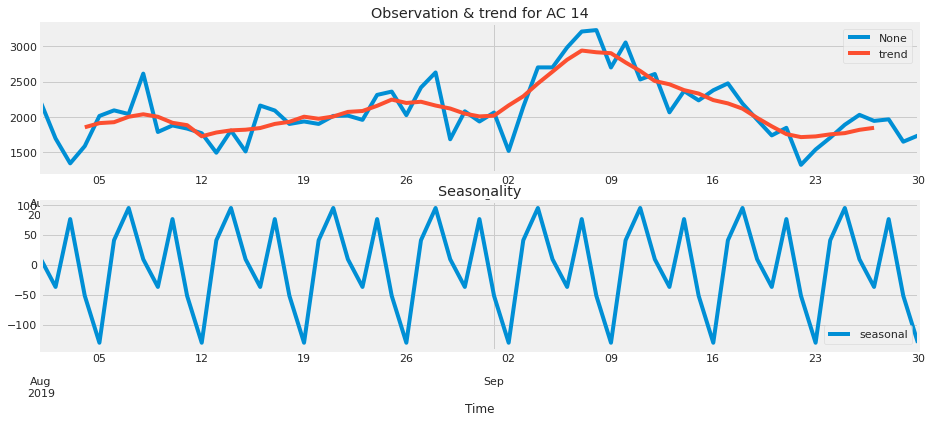

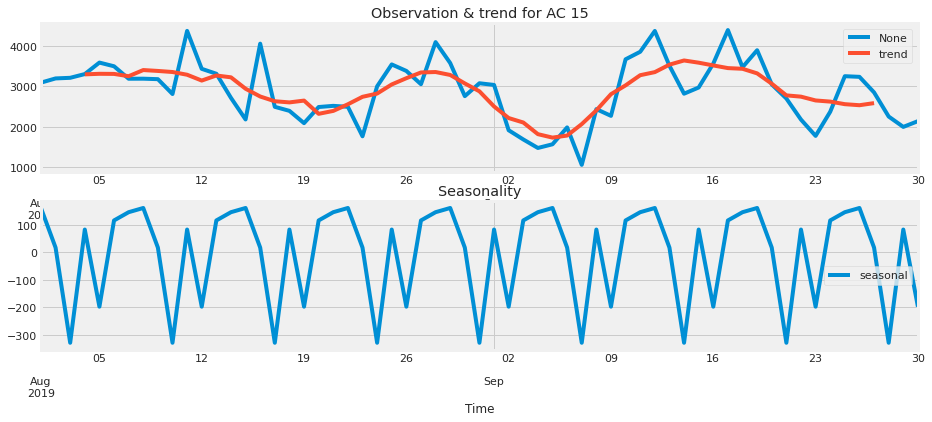

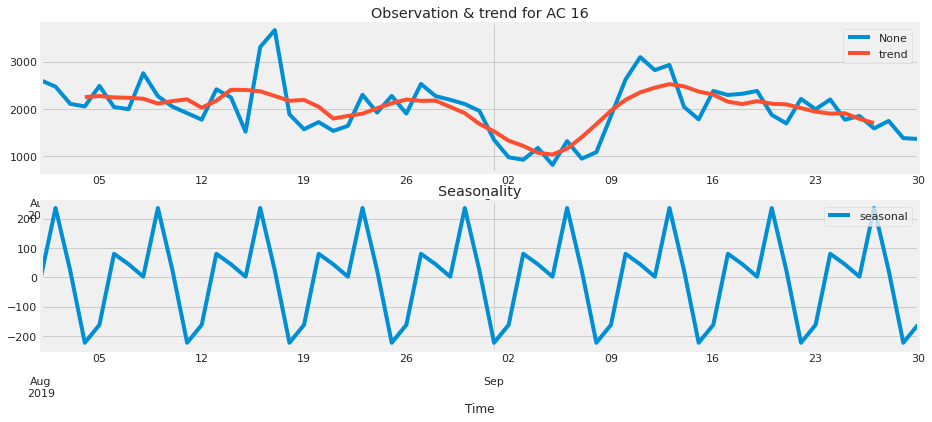

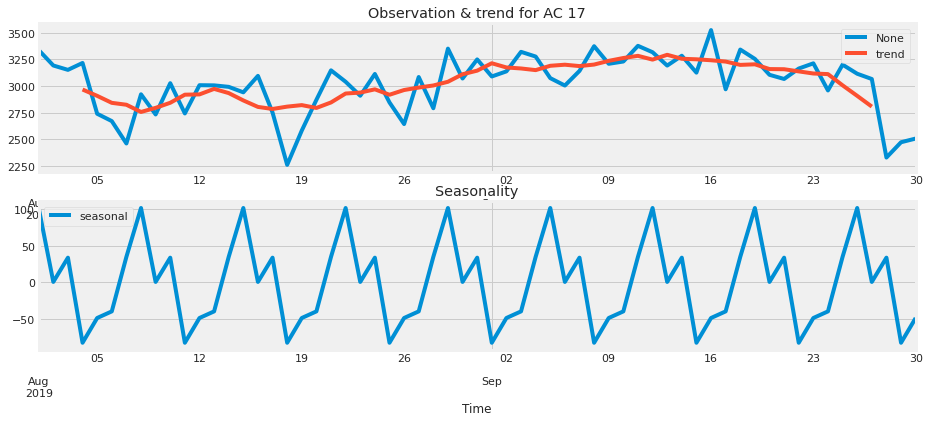

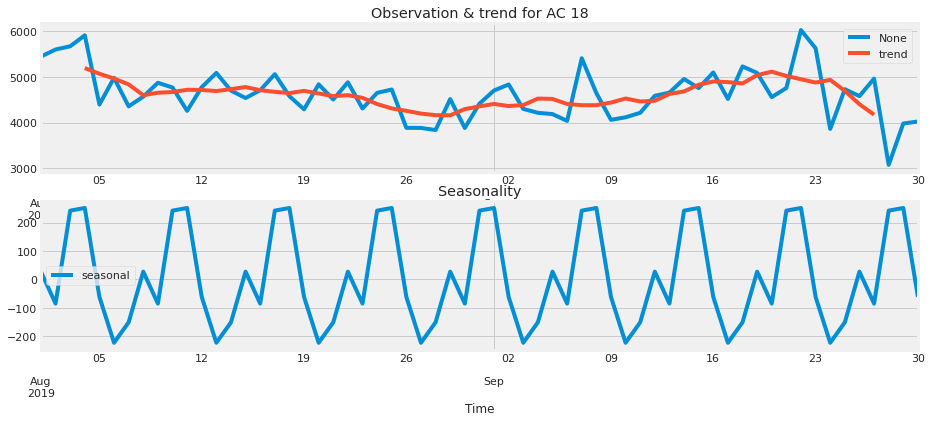

In [138]:
for column in daily_data:
    df1 = daily_data[[column]]
    df1 = df1.dropna()
#     # Plotting the data
#     ax = df1[[column]].plot(linewidth = 2,  figsize=(14, 5)) 
#     ax.set_xlabel('Date')
#     ax.set_ylabel('Consumption')
#     ax.set_title('Consumption')
    
    res = sm.tsa.seasonal_decompose(df1[[column]],period = 7)
    fig, (ax1,ax2) = plt.subplots(2, linewidth = 1, figsize=(14,6))
    res.observed.plot(ax=ax1, legend = 'obsvervation')
    res.trend.plot(ax=ax1, legend = 'Trend')
    res.seasonal.plot(ax=ax2, legend = 'seasonality')
    ax1.set_title('Observation & trend for ' + column)
    ax2.set_title('Seasonality')

# Temperature and Electricity consumption correlation

In [140]:
#Importing csv file
temp_data = pd.read_csv('temp_data.csv')
temp_data['datetime'] = pd.to_datetime(temp_data['datetime'])
temp_data = temp_data.set_index('datetime')

In [141]:
filter1 = temp_data["name"] == 'Gurgaon,India'

In [142]:
temp_data = temp_data.where(filter1)

In [143]:
temp_data = temp_data[['temp']]

In [144]:
temp_data = temp_data.dropna()

In [145]:
temp_data

temp
datetime        
2019-08-01  31.6
2019-08-02  29.7
2019-08-03  28.7
2019-08-04  29.9
2019-08-05  30.7
...          ...
2019-09-26  28.4
2019-09-27  27.3
2019-09-28  27.1
2019-09-29  26.5
2019-09-30  26.5

[61 rows x 1 columns]

In [146]:
daily_data_with_temp = pd.merge(daily_data.reset_index(), temp_data, left_on = 'Time', right_on = 'datetime')

In [147]:
daily_data_with_temp

Time         AC 1         AC 2         AC 3         AC 4  \
0  2019-08-01  3104.309104  5178.653314  1630.817266  2374.203867   
1  2019-08-02  2858.419734  3593.581977  2089.322640  2271.603933   
2  2019-08-03  2342.643465  3080.604766  2109.504047  1368.851146   
3  2019-08-04  2950.357777  3138.325802  1849.015820  1113.272698   
4  2019-08-05  2541.984791  2883.849849  1285.868449   647.581450   
..        ...          ...          ...          ...          ...   
56 2019-09-26  2515.615076  2984.508342  1901.619565  2428.230487   
57 2019-09-27  1649.242239  2362.594738  1194.870389  1886.359334   
58 2019-09-28   855.507412  2318.290566  1335.310591  1085.769141   
59 2019-09-29   815.510246  1698.652595  1648.817431  1231.227745   
60 2019-09-30  1142.746920  2409.094486  1837.824576  1159.765872   

           AC 5         AC 6         AC 7         AC 8         AC 9  \
0   1037.301305  2015.883705  1876.576564  2340.438797  1620.642612   
1   1178.239035  1685.658280  1678.985550  1068.449478  1895.803388   
2    986.814506  1839.578327  2291.289651   924.835843  1980.989410   
3   1099.236903  2546.160319  2014.250945  1116.094952  1790.919247   
4   1202.556730  2731.833220  1787.944404  1182.123289  1869.045967   
..          ...          ...          ...          ...          ...   
56  1038.551192  1656.558793  1482.471577  1640.630593  2108.645087   
57   639.270463  1696.372858  1641.591250  2082.339737  1743.730489   
58   935.988260  1559.825738  1345.690516  1668.293851  1757.968040   
59   733.556657   712.069295  1343.626528  1137.451491  1906.623137   
60   690.821753   507.559907  1156.829079  1610.262631  2197.343172   

          AC 10        AC 11        AC 12        AC 13        AC 14  \
0   1268.278059  1291.303646  1828.139131  3391.582242  2200.493267   
1   1267.474739  1441.221452  2011.115215  3687.542111  1693.435960   
2   1052.104862  1565.555856  2213.709985  3457.940043  1340.961746   
3   1209.314592  1311.968897  2169.716325  3532.554241  1585.776477   
4   1020.467613  2410.518340  2237.245534  3003.746657  2011.984857   
..          ...          ...          ...          ...          ...   
56  1046.216173  2278.151401  1795.362507  3530.108306  2027.850503   
57   902.940516  1752.334810  1822.315245  3055.262788  1941.948583   
58   941.491008  1309.736930  1657.566823  2290.288264  1964.422000   
59   991.452038  1393.739923  1325.485494  2251.851496  1647.825132   
60   883.845246  1244.156038  1699.395261  2148.220501  1734.622890   

          AC 15        AC 16        AC 17        AC 18  temp  
0   3094.283539  2603.788367  3337.813885  5443.447364  31.6  
1   3199.127000  2471.211457  3193.061892  5596.797988  29.7  
2   3214.434392  2109.495541  3152.205214  5668.015362  28.7  
3   3307.656537  2055.193141  3216.802219  5907.917356  29.9  
4   3593.211800  2487.589814  2740.861509  4394.006700  30.7  
..          ...          ...          ...          ...   ...  
56  3238.588959  1852.033010  3115.866908  4577.619004  28.4  
57  2851.417072  1591.519312  3066.362527  4960.847499  27.3  
58  2251.247477  1748.973194  2330.441394  3074.612517  27.1  
59  1993.412009  1386.524426  2473.836238  3979.020354  26.5  
60  2136.590801  1369.969574  2508.379191  4022.343180  26.5  

[61 rows x 20 columns]

In [148]:
daily_data_with_temp=daily_data_with_temp.drop('Time', axis = 1)

In [149]:
daily_data_with_temp
daily_data_with_temp = daily_data_with_temp.set_index('temp')

In [150]:
daily_data_with_temp = daily_data_with_temp.reset_index()

[Text(0.5, 1.0, 'Heatmap')]

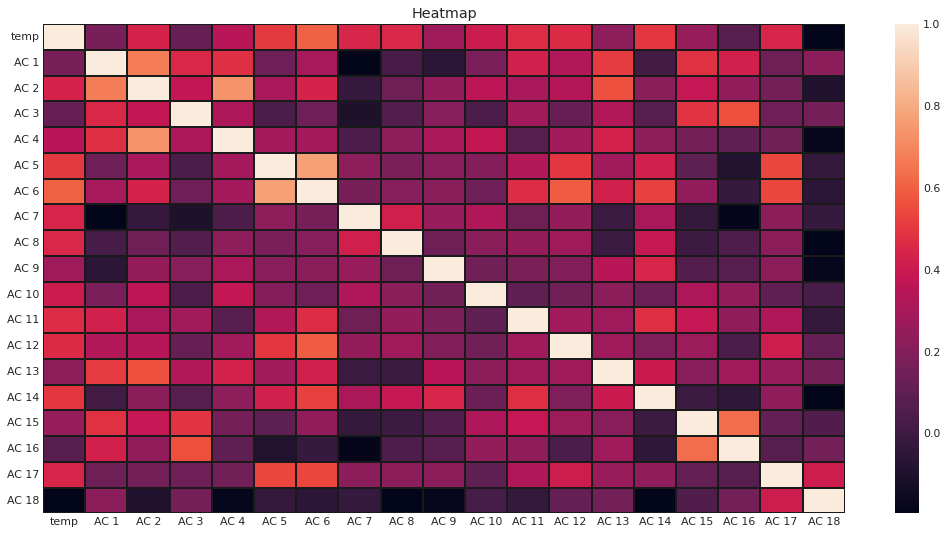

In [152]:
plt.figure(figsize=(16,9))
ax = sns.heatmap(daily_data_with_temp.corr(),linewidths=1, linecolor="k",robust = True)
ax.set(title="Heatmap")

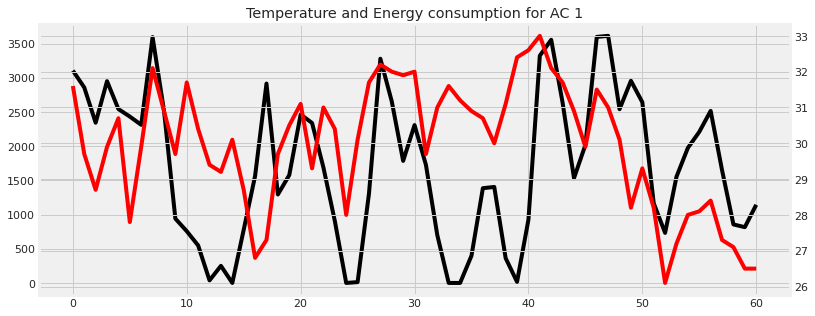

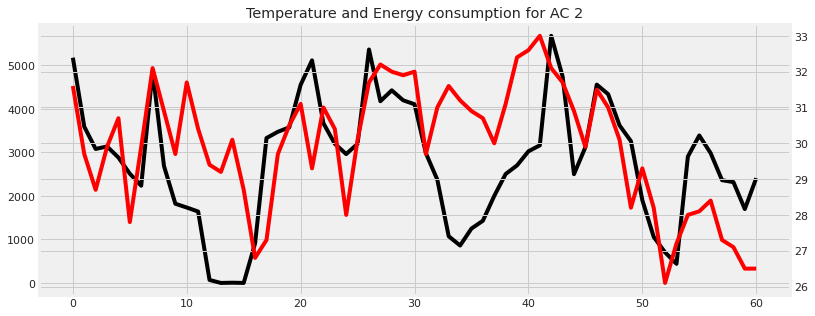

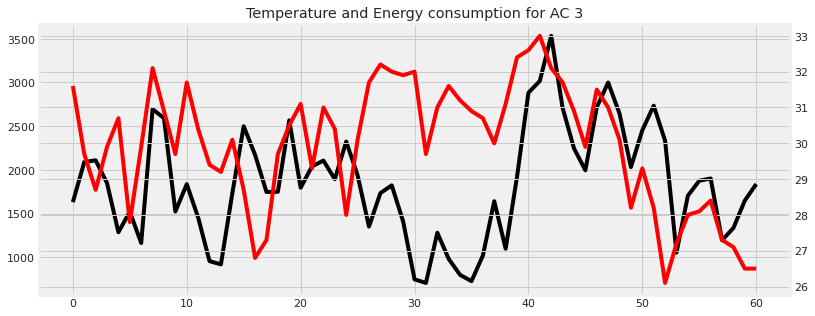

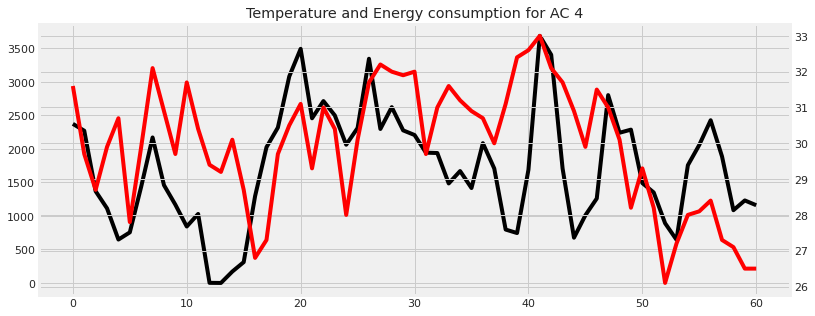

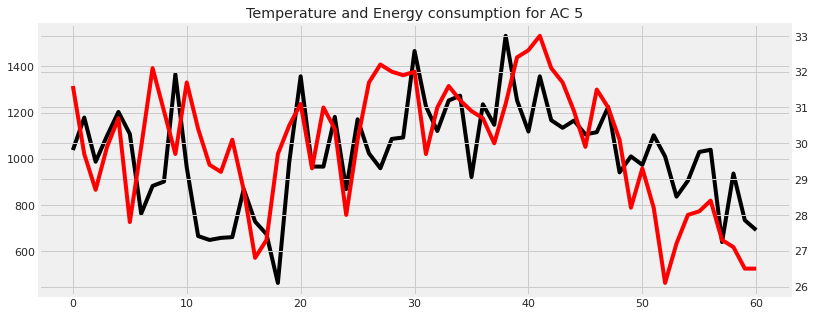

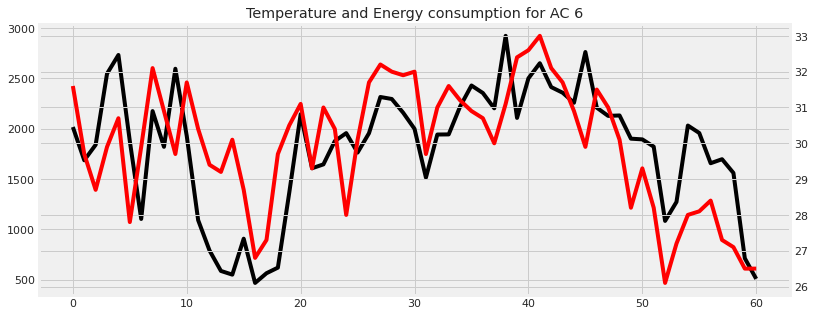

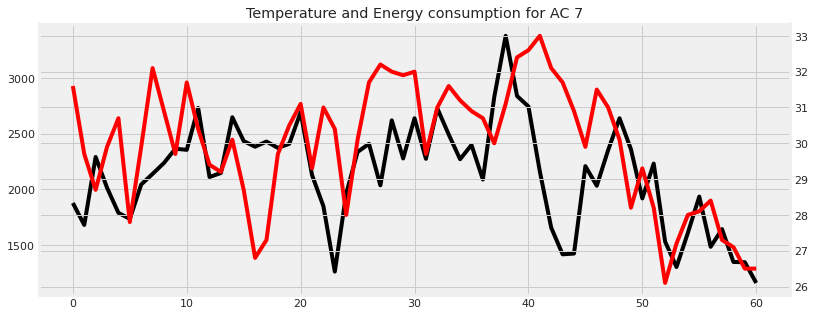

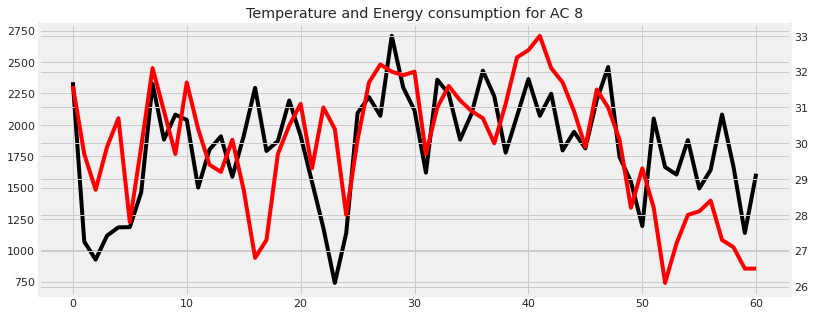

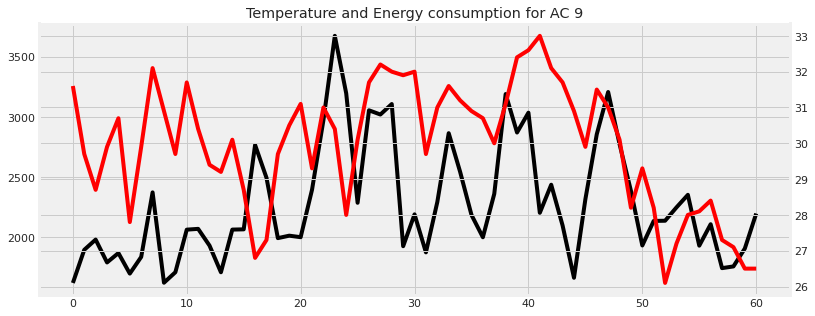

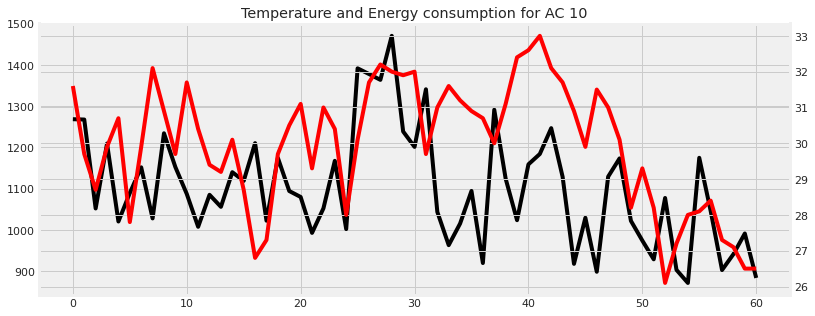

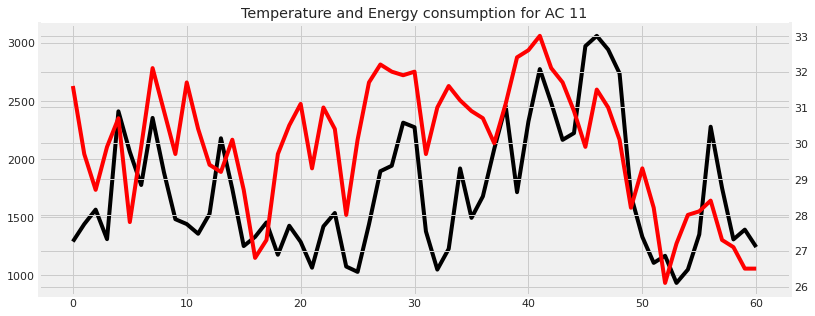

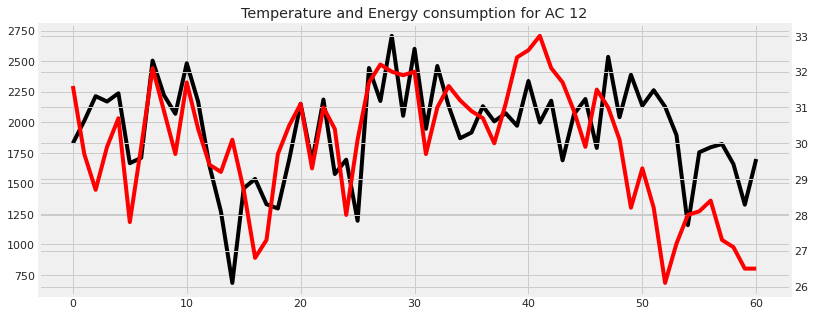

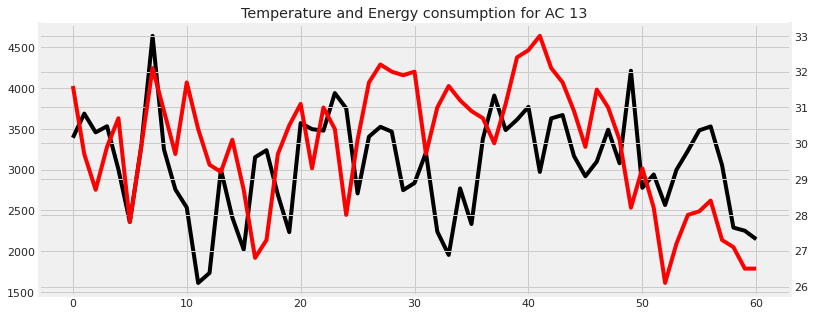

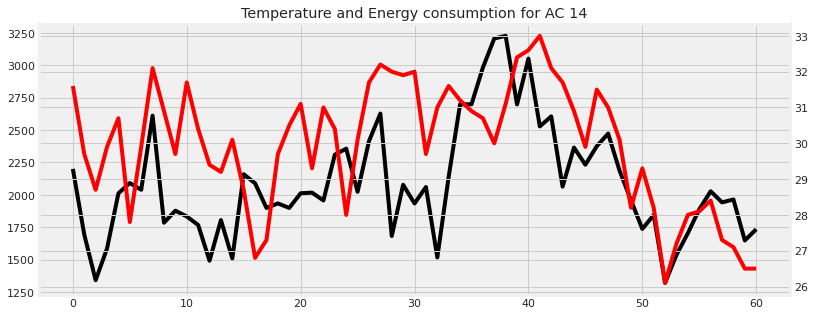

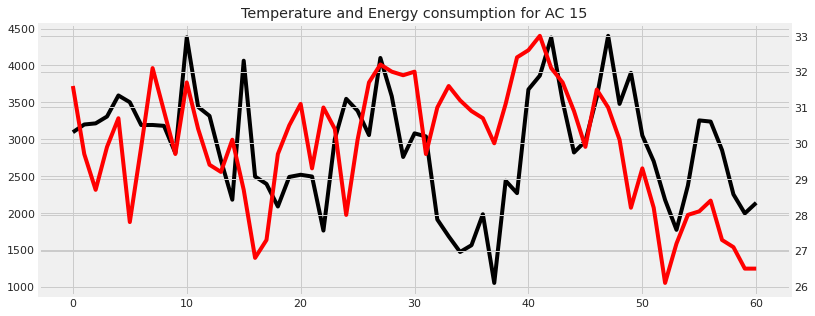

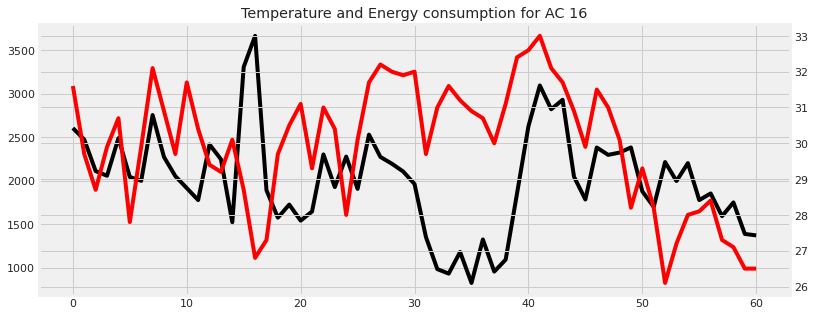

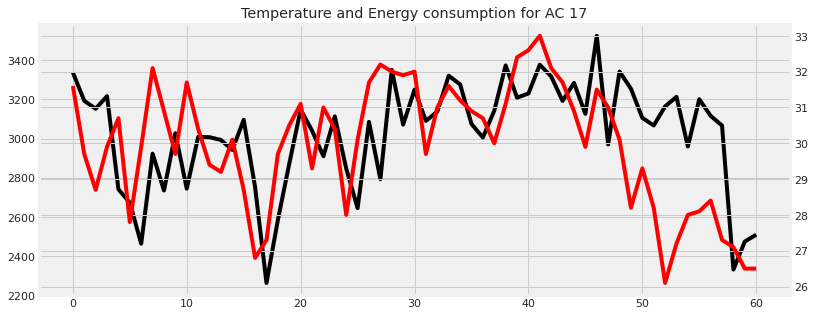

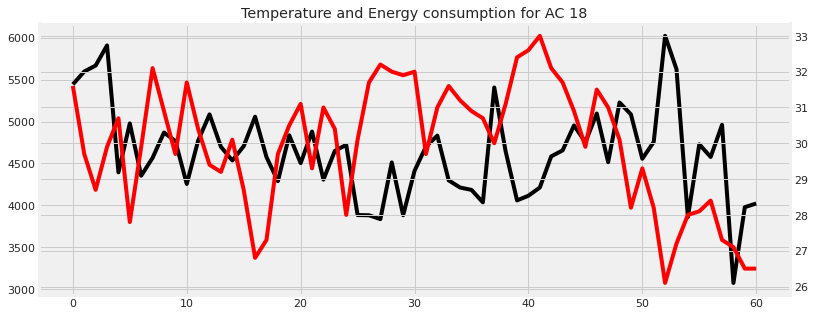

In [157]:
for column in df:
    fig, ax1 = plt.subplots(figsize=(12,5))
    ax2 = ax1.twinx()
    ax1.plot(daily_data_with_temp[column], color='black' ) # Consuption of electricity by AC
    ax2.plot(daily_data_with_temp['temp'], color='red' ) # Temperature
    ax1.set_title(column)
    ax1.set_title('Temperature and Energy consumption for ' + column)

# Prediction Of Consumption for every individual AC

# Sample Output for AC 1

In [164]:
# resample data to hourly level
hourly_groups = df.resample('H')
hourly_data = hourly_groups.sum()

In [165]:
df_prophet = hourly_data.reset_index()

In [166]:
df_prophet = df_prophet[['Time', 'AC 1']]

In [167]:
df_prophet = df_prophet.rename(columns={'Time': 'ds', 'AC 1' : 'y'})

In [168]:
df_prophet.head()

ds           y
0 2019-08-01 00:00:00  205.245213
1 2019-08-01 01:00:00  222.230520
2 2019-08-01 02:00:00  220.526540
3 2019-08-01 03:00:00  199.178419
4 2019-08-01 04:00:00  197.929595

In [169]:
import fbprophet
from fbprophet import Prophet
m = Prophet(daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False
            ).add_seasonality(name="monthly", period=30.5, fourier_order=12
            ).add_seasonality(name="weekly", period=7, fourier_order=12
            ).add_seasonality(name="daily", period=1, fourier_order=12
            ).fit(df_prophet)


Initial log joint probability = -82.587
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1974.61     0.0535414       176.935           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1982.92    0.00542305       73.0658      0.6217      0.6217      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       1984.14    0.00316386       208.625     3.9e-05       0.001      306  LS failed, Hessian reset 
     299       1987.23    7.1436e-05       60.7135      0.8624      0.8624      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       1987.45   0.000711995       79.6442   9.717e-06       0.001      523  LS failed, Hessian reset 
     399       1987.53   0.000116724        67.114      0.2107           1      583   
    Iter      log prob

In [170]:
future = m.make_future_dataframe(periods=72, freq='h',include_history=False) #periods is no of hours


In [171]:
future

ds
0  2019-10-01 00:00:00
1  2019-10-01 01:00:00
2  2019-10-01 02:00:00
3  2019-10-01 03:00:00
4  2019-10-01 04:00:00
..                 ...
67 2019-10-03 19:00:00
68 2019-10-03 20:00:00
69 2019-10-03 21:00:00
70 2019-10-03 22:00:00
71 2019-10-03 23:00:00

[72 rows x 1 columns]

In [172]:
fcst = m.predict(future)

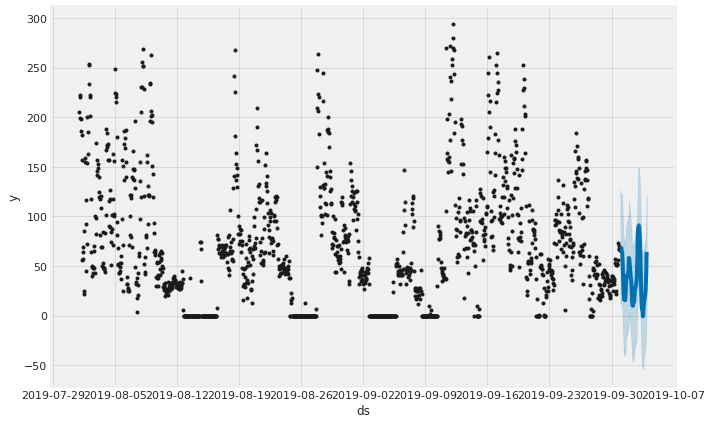

In [173]:
fig = m.plot(fcst)

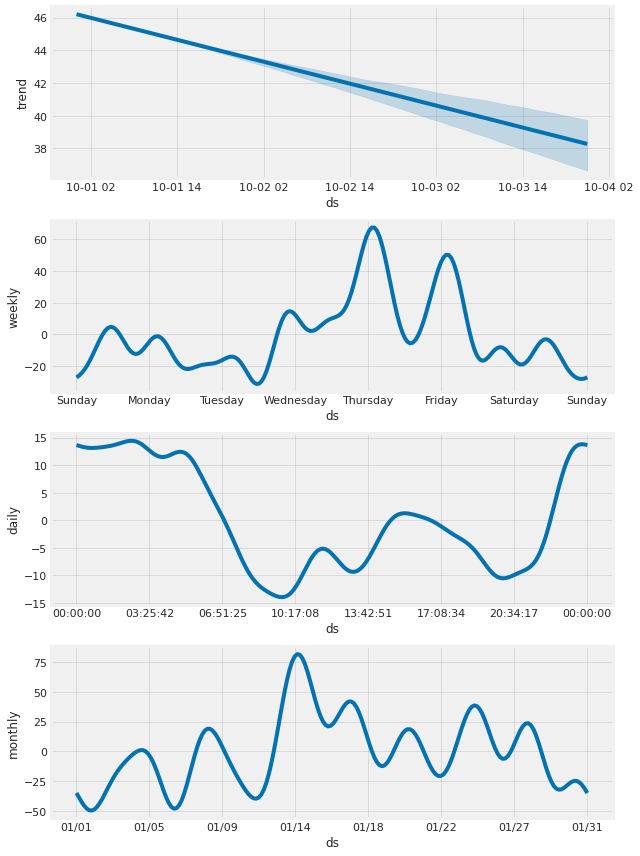

In [174]:
#### Visualize Each Components[Trends,yearly]
plot_comp = m.plot_components(fcst)

In [175]:
fcst[['ds','yhat']]

ds       yhat
0  2019-10-01 00:00:00  67.221600
1  2019-10-01 01:00:00  67.298129
2  2019-10-01 02:00:00  68.255352
3  2019-10-01 03:00:00  67.920684
4  2019-10-01 04:00:00  64.252413
..                 ...        ...
67 2019-10-03 19:00:00  20.707935
68 2019-10-03 20:00:00  23.837072
69 2019-10-03 21:00:00  32.139765
70 2019-10-03 22:00:00  44.450063
71 2019-10-03 23:00:00  64.206569

[72 rows x 2 columns]

# Prediction for all ACs

Initial log joint probability = -82.587
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       1974.61     0.0535414       176.935           1           1      116   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       1982.92    0.00542305       73.0658      0.6217      0.6217      234   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     209       1984.14    0.00316386       208.625     3.9e-05       0.001      306  LS failed, Hessian reset 
     299       1987.23    7.1436e-05       60.7135      0.8624      0.8624      415   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     351       1987.45   0.000711995       79.6442   9.717e-06       0.001      523  LS failed, Hessian reset 
     399       1987.53   0.000116724        67.114      0.2107           1      583   
    Iter      log prob

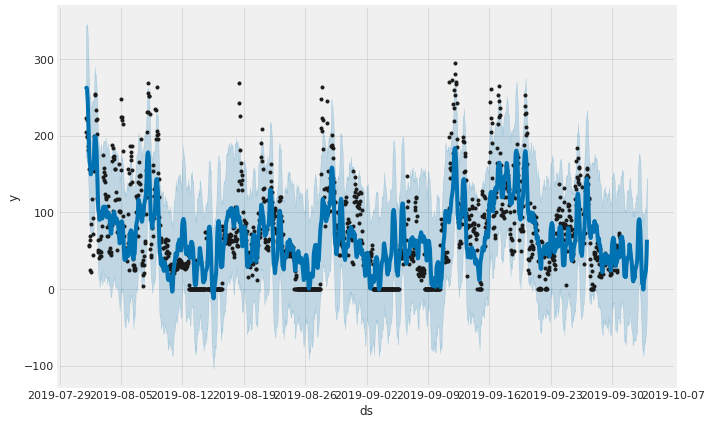

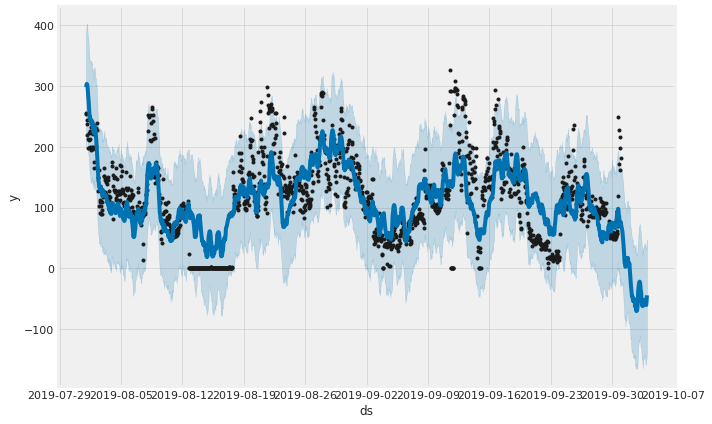

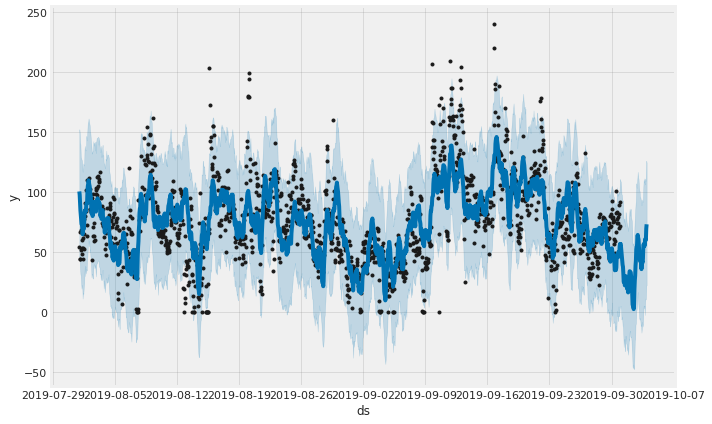

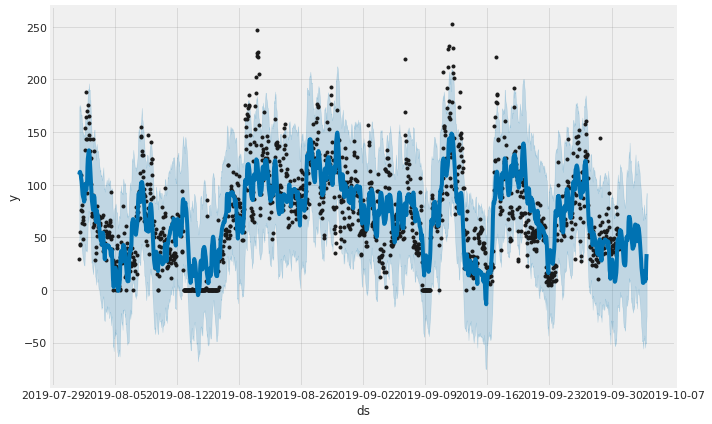

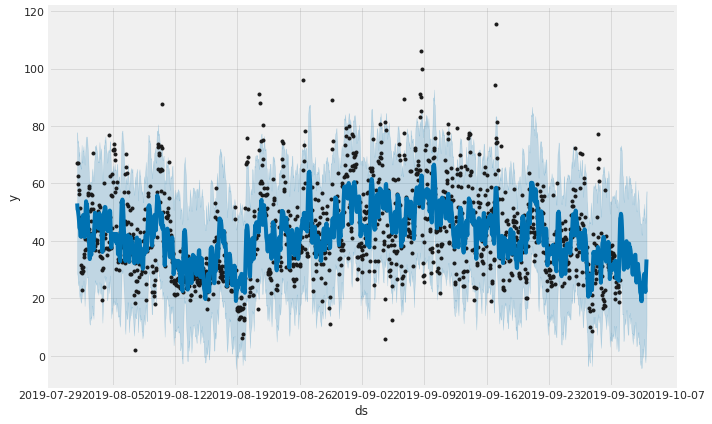

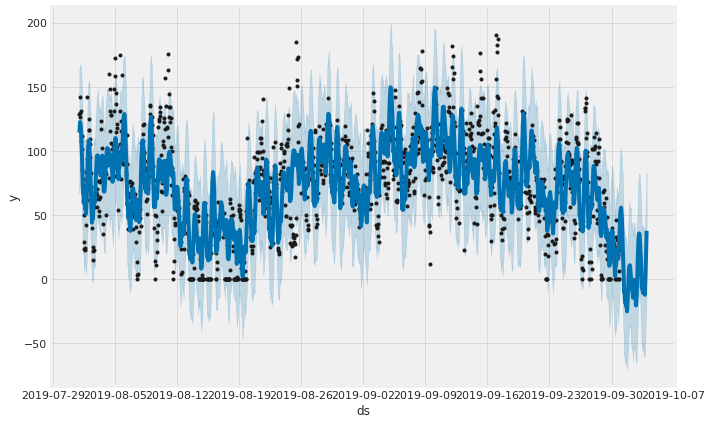

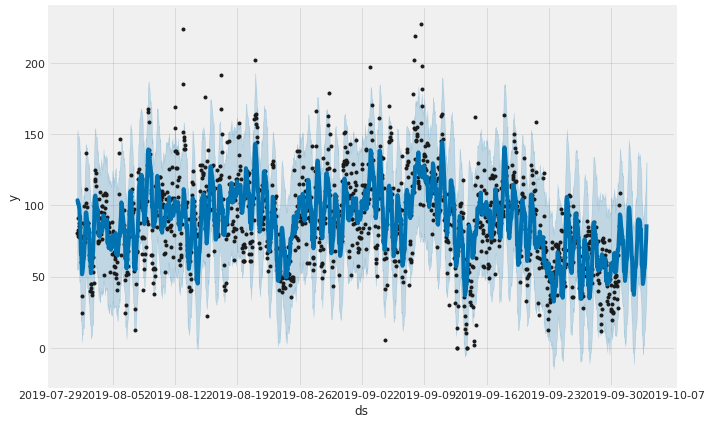

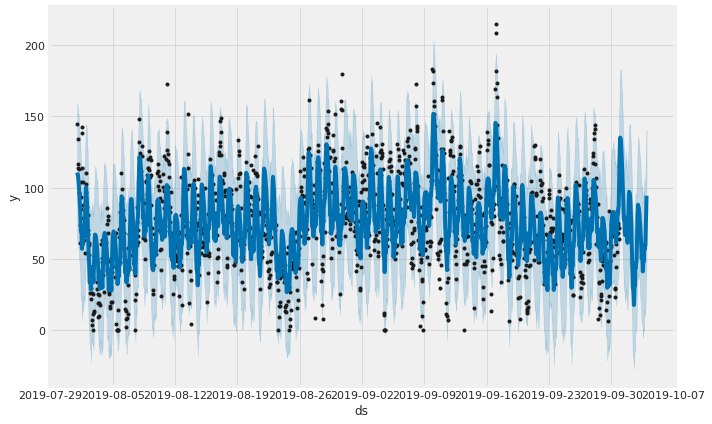

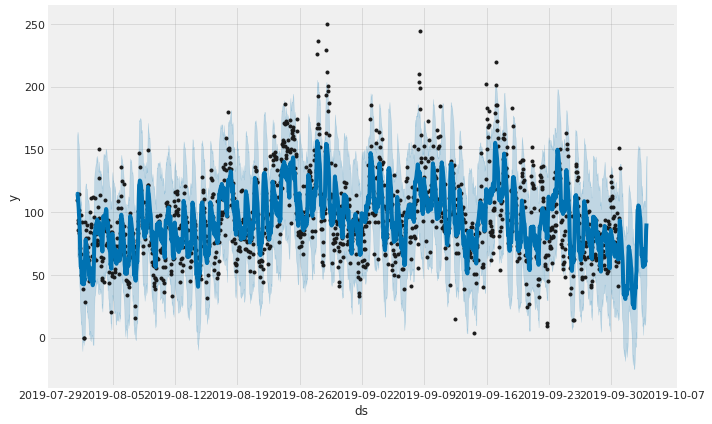

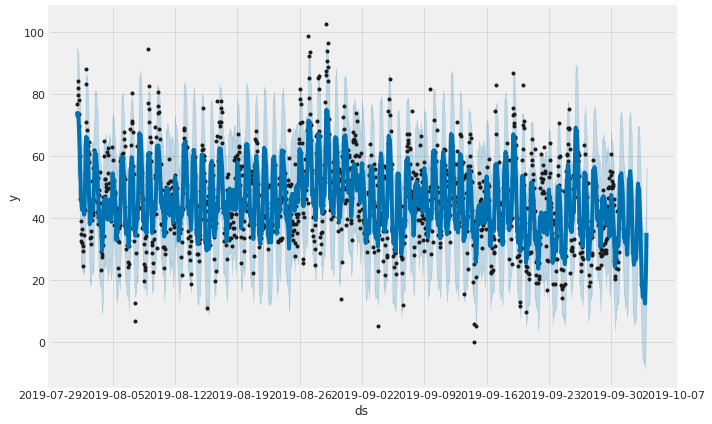

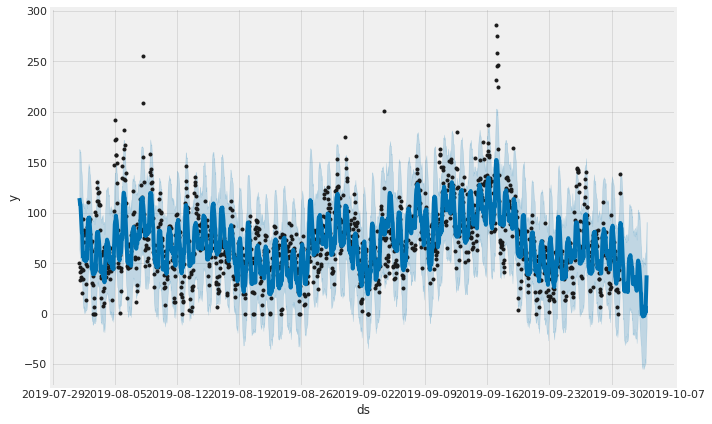

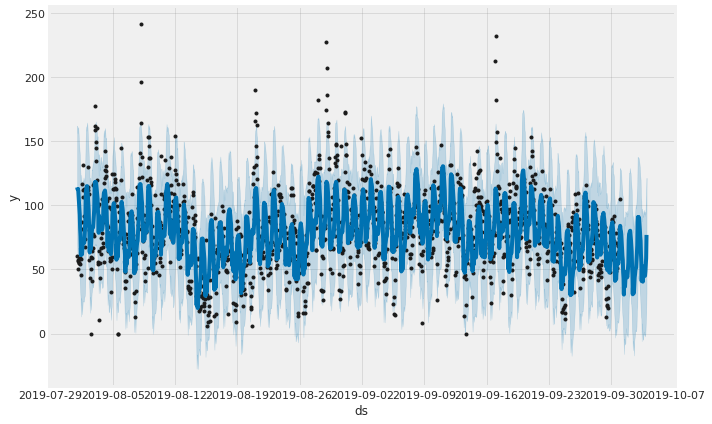

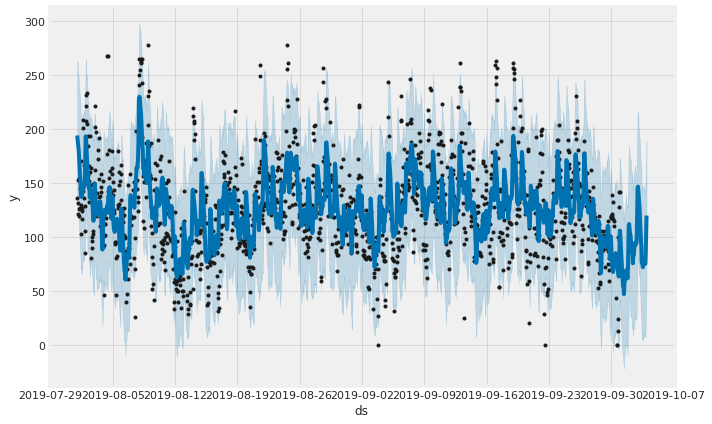

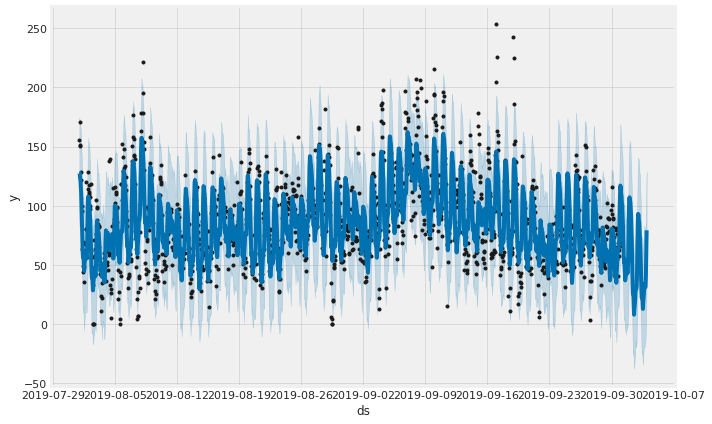

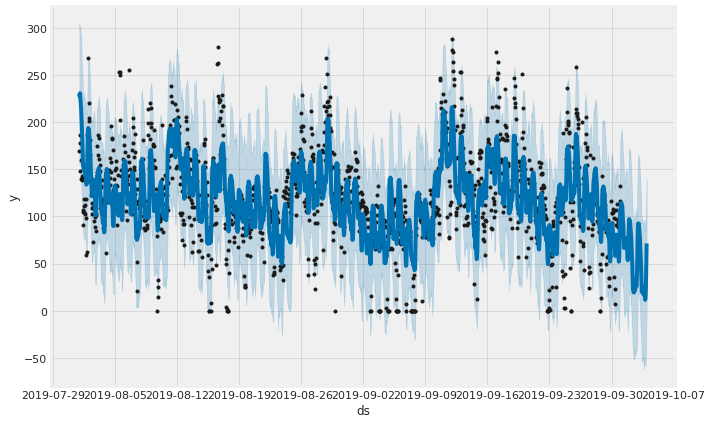

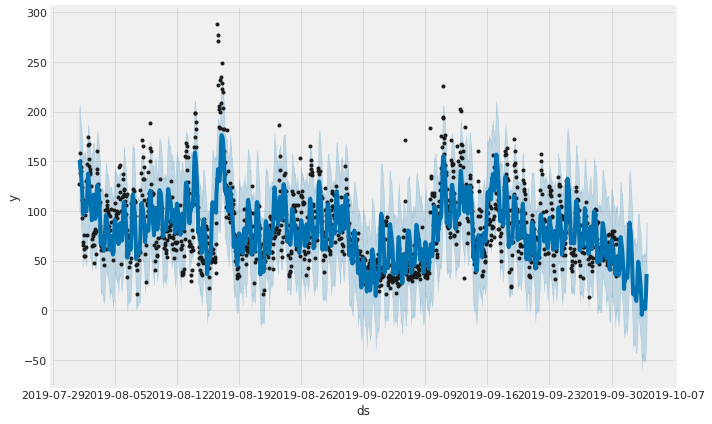

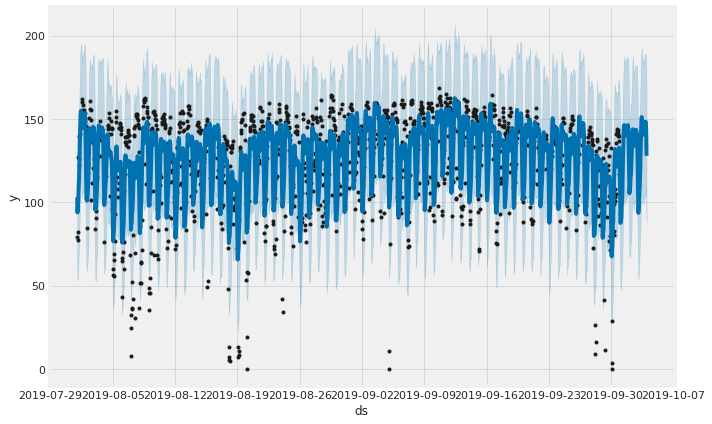

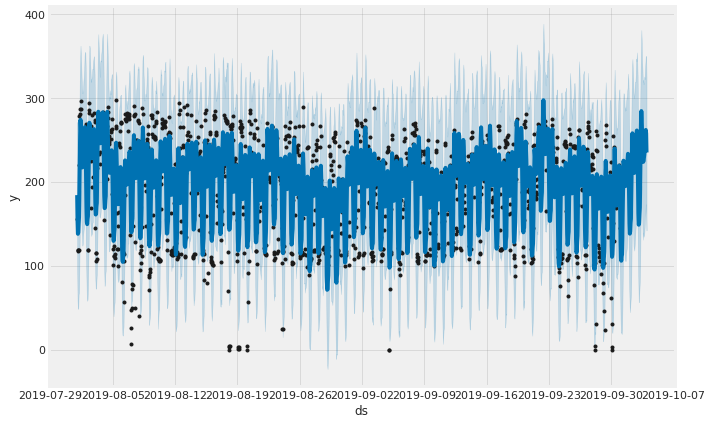

In [179]:
# resample data to hourly level
hourly_groups = df.resample('H')
hourly_data = hourly_groups.sum()

for column in df:
    df_prophet = hourly_data.reset_index()
    df_prophet = df_prophet[['Time', column]]
    df_prophet = df_prophet.rename(columns={'Time': 'ds', column : 'y'})
    m = Prophet(interval_width=0.95,seasonality_mode = 'additive',daily_seasonality=False, weekly_seasonality=False, yearly_seasonality=False
            ).add_seasonality(name="monthly", period=30.5, fourier_order=12
            ).add_seasonality(name="weekly", period=7, fourier_order=12
            ).add_seasonality(name="hourly", period=1, fourier_order=12
            ).fit(df_prophet)
    future = m.make_future_dataframe(periods=72, freq='h',include_history=True)
    fcst = m.predict(future)
    fig = m.plot(fcst)